In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

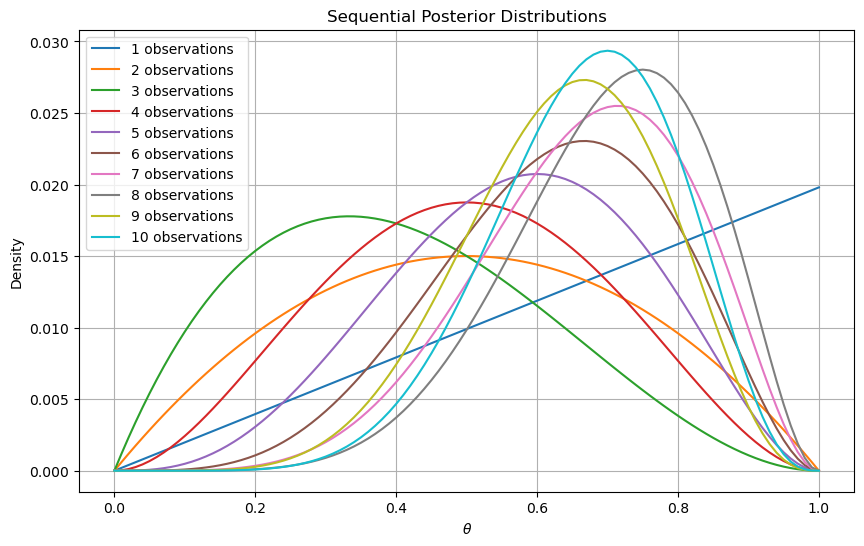

In [2]:
#Q1
# prior
theta = np.linspace(0, 1, 101)
prior = np.ones(len(theta)) / len(theta)  

# Likelihood Binomial 
def likelihood(theta, x, n):
    return theta**x * (1 - theta)**(n - x)

# Posterior 
def posterior(theta, x, n, prior):
    likelihood_val = likelihood(theta, x, n)
    posterior = likelihood_val * prior
    return posterior / posterior.sum()

# update posterior
n = 10
observations = np.random.binomial(1, 0.5, n)  
posteriors = []

current_prior = prior.copy()
for i, obs in enumerate(observations):
    post = posterior(theta, obs, 1, current_prior)
    posteriors.append(post)
    current_prior = post  # Update prior

# Plot
plt.figure(figsize=(10, 6))
for i, post in enumerate(posteriors):
    plt.plot(theta, post, label=f'{i+1} observations')
plt.title("Sequential Posterior Distributions")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

The posterior distribution is 
$$
p(\theta|x) \sim \text{Beta}(\alpha, \beta) = \text{Beta}(x + 1, n - x + 1)
$$

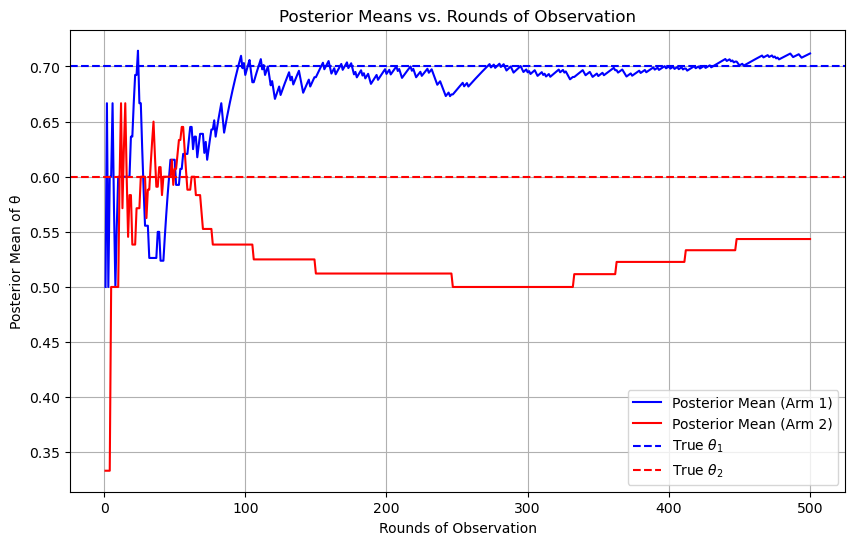

In [3]:
#Q2
m = 500
theta_true_1 = 0.7
theta_true_2 = 0.6
alpha_1, beta_1 = 1, 1  
alpha_2, beta_2 = 1, 1  

#Track posterior means 
posterior_means_1 = []
posterior_means_2 = []

# Bayesian MAB (Thompson) 
for t in range(m):
    #Sample from posterior 
    theta_sample_1 = np.random.beta(alpha_1, beta_1)
    theta_sample_2 = np.random.beta(alpha_2, beta_2)
    #Choose arm with the higher value
    if theta_sample_1 > theta_sample_2:
        reward = np.random.binomial(1, theta_true_1)
        alpha_1 += reward
        beta_1 += 1 - reward
    else:
        reward = np.random.binomial(1, theta_true_2)
        alpha_2 += reward
        beta_2 += 1 - reward

    #Store posterior means E[X] = a/a+b
    posterior_means_1.append(alpha_1 / (alpha_1 + beta_1))
    posterior_means_2.append(alpha_2 / (alpha_2 + beta_2))

#Plot posterior vs true theta 
plt.figure(figsize=(10, 6))
plt.plot(range(1, m+1), posterior_means_1, label="Posterior Mean (Arm 1)", color="blue")
plt.plot(range(1, m+1), posterior_means_2, label="Posterior Mean (Arm 2)", color="red")
plt.axhline(y=theta_true_1, color="blue", linestyle="--", label=r"True $\theta_1$")
plt.axhline(y=theta_true_2, color="red", linestyle="--", label=r"True $\theta_2$")
plt.title("Posterior Means vs. Rounds of Observation")
plt.xlabel("Rounds of Observation")
plt.ylabel("Posterior Mean of θ")
plt.legend()
plt.grid()
plt.show()


In [4]:
#Q3
m = 500
theta_true_1 = 0.7
theta_true_2 = 0.6
theta_true_3 = 0.5
alpha_1, beta_1 = 1, 1
alpha_2, beta_2 = 1, 1
alpha_3, beta_3 = 1, 1

# Dirichlet parameters
alpha_dir = [1, 1, 1]

# Track posterior means (Beta-Binomial)
posterior_means_1 = []
posterior_means_2 = []
posterior_means_3 = []

# Track posterior means (Dirichlet)
posterior_dir_means = []

# MAB
for t in range(m):
    #sample
    theta_sample_1 = np.random.beta(alpha_1, beta_1)
    theta_sample_2 = np.random.beta(alpha_2, beta_2)
    theta_sample_3 = np.random.beta(alpha_3, beta_3)

    if theta_sample_1 > max(theta_sample_2, theta_sample_3):
        reward = np.random.binomial(1, theta_true_1)
        alpha_1 += reward
        beta_1 += 1 - reward
    elif theta_sample_2 > max(theta_sample_1, theta_sample_3):
        reward = np.random.binomial(1, theta_true_2)
        alpha_2 += reward
        beta_2 += 1 - reward
    else:
        reward = np.random.binomial(1, theta_true_3)
        alpha_3 += reward
        beta_3 += 1 - reward

    posterior_means_1.append(alpha_1 / (alpha_1 + beta_1))
    posterior_means_2.append(alpha_2 / (alpha_2 + beta_2))
    posterior_means_3.append(alpha_3 / (alpha_3 + beta_3))

    # Dirichlet-Multinomial analysis
    theta_sample_dir = np.random.dirichlet(alpha_dir)
    chosen_arm = np.argmax(theta_sample_dir)

    if chosen_arm == 0:
        reward = np.random.binomial(1, theta_true_1)
        alpha_dir[0] += reward
    elif chosen_arm == 1:
        reward = np.random.binomial(1, theta_true_2)
        alpha_dir[1] += reward
    else:
        reward = np.random.binomial(1, theta_true_3)
        alpha_dir[2] += reward

    posterior_dir_means.append(
        [alpha_dir[i] / sum(alpha_dir) for i in range(3)]
    )



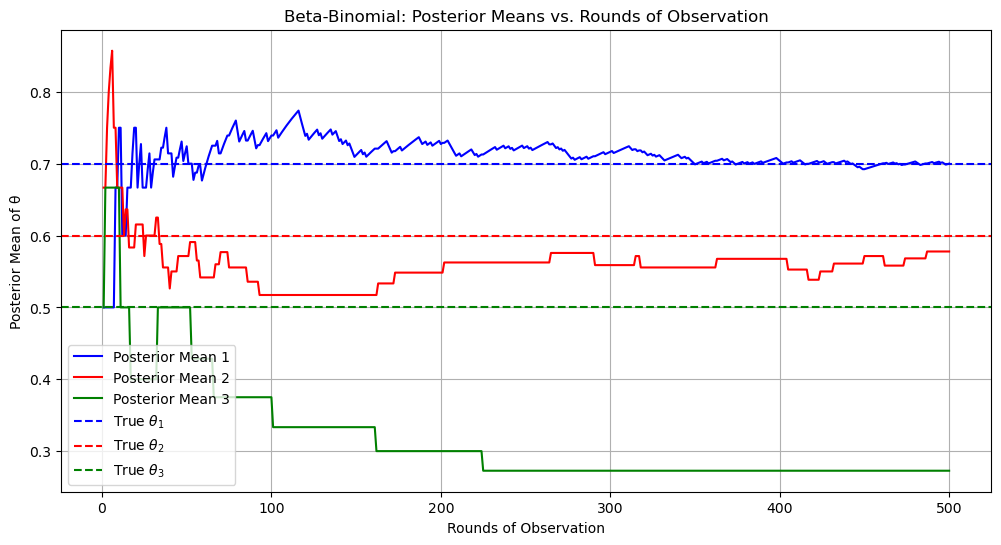

In [5]:
# Plot results for Beta-Binomial
plt.figure(figsize=(12, 6))
plt.plot(range(1, m + 1), posterior_means_1, label="Posterior Mean 1", color="blue")
plt.plot(range(1, m + 1), posterior_means_2, label="Posterior Mean 2", color="red")
plt.plot(range(1, m + 1), posterior_means_3, label="Posterior Mean 3", color="green")
plt.axhline(y=theta_true_1, color="blue", linestyle="--", label=r"True $\theta_1$")
plt.axhline(y=theta_true_2, color="red", linestyle="--", label=r"True $\theta_2$")
plt.axhline(y=theta_true_3, color="green", linestyle="--", label=r"True $\theta_3$")
plt.title("Beta-Binomial: Posterior Means vs. Rounds of Observation")
plt.xlabel("Rounds of Observation")
plt.ylabel("Posterior Mean of θ")
plt.legend()
plt.grid()
plt.show()

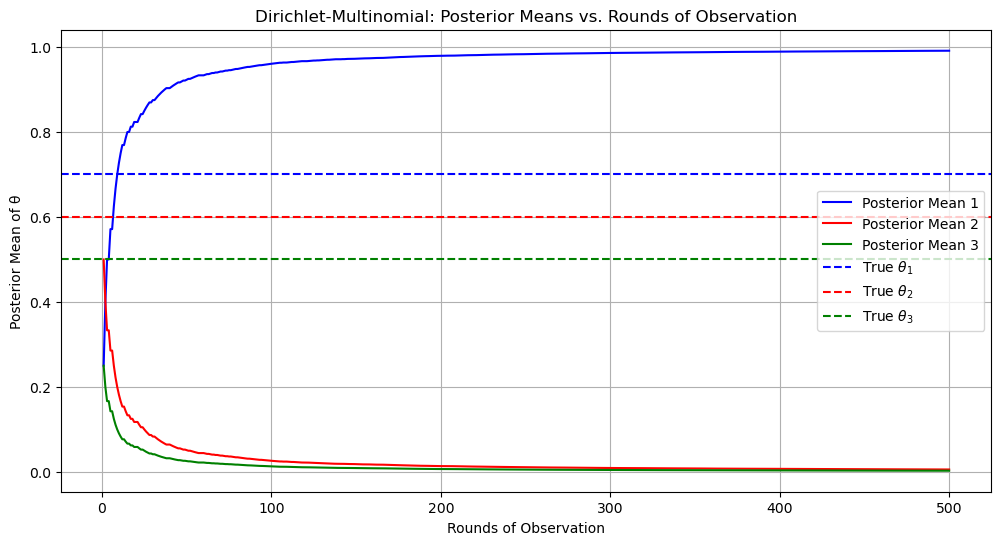

In [6]:
# Plot results for Dirichlet-Multinomial
posterior_dir_means = np.array(posterior_dir_means)
plt.figure(figsize=(12, 6))
plt.plot(range(1, m + 1), posterior_dir_means[:, 0], label="Posterior Mean 1", color="blue")
plt.plot(range(1, m + 1), posterior_dir_means[:, 1], label="Posterior Mean 2", color="red")
plt.plot(range(1, m + 1), posterior_dir_means[:, 2], label="Posterior Mean 3", color="green")
plt.axhline(y=theta_true_1, color="blue", linestyle="--", label=r"True $\theta_1$")
plt.axhline(y=theta_true_2, color="red", linestyle="--", label=r"True $\theta_2$")
plt.axhline(y=theta_true_3, color="green", linestyle="--", label=r"True $\theta_3$")
plt.title("Dirichlet-Multinomial: Posterior Means vs. Rounds of Observation")
plt.xlabel("Rounds of Observation")
plt.ylabel("Posterior Mean of θ")
plt.legend()
plt.grid()
plt.show()

From the graphs, we see that although beta-binomial provides a better estimate, there is a slower convergence, therefore it would be beneficial to employ the beta-binomial in a situation where there is a large and independent dataset. For the dirichlet model, there is a tendency to converge towards the arm with the highest probability that is sampled (overconfidence on early leading arm), which limits the exploration of potential optimal arm, making it more suitable for a small dataset, or one that needs to be converged towards with the least amount of time. Additionally, the dirichlet model assumes that the data in one arm has dependencies in the other arm, which inflences the posterior. This means that the dirichlet should employed in scencarios where the choices are closely related, where as beta-binomial should be employed on datasets where the choices are independent of each other.